# Lev Kozlov

# configuration XYZYX

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# set numpy print precision 
np.set_printoptions(precision=3)

In [66]:
# basic functions

def Rz(theta, s=False):
    if s:
        # return symbolic version
        return sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0, 0],
                          [sp.sin(theta), sp.cos(theta), 0, 0],
                          [0, 0, 1, 0],
                          [0, 0, 0, 1]])

    return np.array([[np.cos(theta), -np.sin(theta), 0, 0],
                     [np.sin(theta), np.cos(theta), 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]]).astype(np.float64)


def Ry(theta, s=False):
    if s:
        # return symbolic version
        return sp.Matrix([[sp.cos(theta), 0, sp.sin(theta), 0],
                          [0, 1, 0, 0],
                          [-sp.sin(theta), 0, sp.cos(theta), 0],
                          [0, 0, 0, 1]])
    return np.array([[np.cos(theta), 0, np.sin(theta), 0],
                     [0, 1, 0, 0],
                     [-np.sin(theta), 0, np.cos(theta), 0],
                     [0, 0, 0, 1]]).astype(np.float64)


def Rx(theta, s=False):
    if s:
        # return symbolic version
        return sp.Matrix([[1, 0, 0, 0],
                          [0, sp.cos(theta), -sp.sin(theta), 0],
                          [0, sp.sin(theta), sp.cos(theta), 0],
                          [0, 0, 0, 1]])
    return np.array([[1, 0, 0, 0],
                     [0, np.cos(theta), -np.sin(theta), 0],
                     [0, np.sin(theta), np.cos(theta), 0],
                     [0, 0, 0, 1]]).astype(np.float64)


def Tx(x, s=False):
    if s:
        # return symbolic version
        return sp.Matrix([[1, 0, 0, x],
                          [0, 1, 0, 0],
                          [0, 0, 1, 0],
                          [0, 0, 0, 1]])
    return np.array([[1, 0, 0, x],
                     [0, 1, 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])


def Ty(y, s=False):
    if s:
        # return symbolic version
        return sp.Matrix([[1, 0, 0, 0],
                          [0, 1, 0, y],
                          [0, 0, 1, 0],
                          [0, 0, 0, 1]])
    return np.array([[1, 0, 0, 0],
                     [0, 1, 0, y],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])


def Tz(z, s=False):
    if s:
        # return symbolic version
        return sp.Matrix([[1, 0, 0, 0],
                          [0, 1, 0, 0],
                          [0, 0, 1, z],
                          [0, 0, 0, 1]])
    return np.array([[1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, z],
                     [0, 0, 0, 1]])


# Forward kinematics derivation

Links parameters are took from urdf - 0.5m each link (*l1*, *l2*, *l3*)

### Links assignment

<img src="assets/frames.jpg" height=500 />

### Kinematics derivation

$$T = T_1^0 \cdot T_2^1 \cdot T_3^2 \cdot T_4^3 \cdot T_5^4$$

$$ T_1^0 = T_x(d_0) $$
$$ T_2^1 = T_y(d_1) $$
$$ T_3^2 = T_z(l_1) \cdot R_z(q_2) $$
$$ T_4^3 = T_z(l_2) \cdot R_y(q_3 - \frac{\pi}{2}) $$
$$ T_5^4 = T_x(l_3) \cdot R_x(q_4) $$

In [67]:
# forward kinematics

# we have to define 4 links, for simplicity we will use the same length for all of them (0.5m)

l1 = 0.5
l2 = 0.5
l3 = 0.5

def fk(q, s=False):
    return fk_i(q, -1, s)


def fk_i(q, i, s=False):
    # returns transformation for i-th frame
    if i == -1:
        i = 5
    if s:
        transform = sp.eye(4)
    else:
        transform = np.eye(4)

    transforms = [
        transform,
        Tx(q[0], s),
        Ty(q[1], s),
        Tz(l1, s) @ Rz(q[2], s),
        Tz(l2, s) @ Ry(q[3] - (np.pi / 2 if not s else sp.pi / 2), s),
        Tx(l3, s) @ Rx(q[4], s),
    ]

    for j in range(i + 1):
        transform = transform @ transforms[j]

    return transform


def t2pos(t):
    return t[:3, 3]


def t2rot(t):
    return t[:3, :3]


In [97]:
# example of zero configuration

t = sp.symbols('t')

# create symbolic version of joints
q0 = sp.Function('q0')(t)
q1 = sp.Function('q1')(t)
q2 = sp.Function('q2')(t)
q3 = sp.Function('q3')(t)
q4 = sp.Function('q4')(t)

q_s = [q0, q1, q2, q3, q4]

T = fk(q_s, s=True)

# # rotation
# print(sp.latex(T[:3, :3]))

# # position
# print(sp.latex(T[:3, 3]))


$$R(\vec{q}) = \left[\begin{matrix}\sin{\left(q_{3}{\left(t \right)} \right)} \cos{\left(q_{2}{\left(t \right)} \right)} & - \sin{\left(q_{2}{\left(t \right)} \right)} \cos{\left(q_{4}{\left(t \right)} \right)} - \sin{\left(q_{4}{\left(t \right)} \right)} \cos{\left(q_{2}{\left(t \right)} \right)} \cos{\left(q_{3}{\left(t \right)} \right)} & \sin{\left(q_{2}{\left(t \right)} \right)} \sin{\left(q_{4}{\left(t \right)} \right)} - \cos{\left(q_{2}{\left(t \right)} \right)} \cos{\left(q_{3}{\left(t \right)} \right)} \cos{\left(q_{4}{\left(t \right)} \right)}\\\sin{\left(q_{2}{\left(t \right)} \right)} \sin{\left(q_{3}{\left(t \right)} \right)} & - \sin{\left(q_{2}{\left(t \right)} \right)} \sin{\left(q_{4}{\left(t \right)} \right)} \cos{\left(q_{3}{\left(t \right)} \right)} + \cos{\left(q_{2}{\left(t \right)} \right)} \cos{\left(q_{4}{\left(t \right)} \right)} & - \sin{\left(q_{2}{\left(t \right)} \right)} \cos{\left(q_{3}{\left(t \right)} \right)} \cos{\left(q_{4}{\left(t \right)} \right)} - \sin{\left(q_{4}{\left(t \right)} \right)} \cos{\left(q_{2}{\left(t \right)} \right)}\\\cos{\left(q_{3}{\left(t \right)} \right)} & \sin{\left(q_{3}{\left(t \right)} \right)} \sin{\left(q_{4}{\left(t \right)} \right)} & \sin{\left(q_{3}{\left(t \right)} \right)} \cos{\left(q_{4}{\left(t \right)} \right)}\end{matrix}\right]$$

$$P(\vec{q}) = \left[\begin{matrix}q_{0}{\left(t \right)} + 0.5 \sin{\left(q_{3}{\left(t \right)} \right)} \cos{\left(q_{2}{\left(t \right)} \right)}\\q_{1}{\left(t \right)} + 0.5 \sin{\left(q_{2}{\left(t \right)} \right)} \sin{\left(q_{3}{\left(t \right)} \right)}\\0.5 \cos{\left(q_{3}{\left(t \right)} \right)} + 1.0\end{matrix}\right]$$

In [69]:
# evaluate forward kinematics for zero configuration

q = np.zeros(5)

T = fk(q)

T


array([[ 6.123e-17,  0.000e+00, -1.000e+00,  3.062e-17],
       [ 0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00],
       [ 1.000e+00,  0.000e+00,  6.123e-17,  1.500e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00]])

As expected we see that Z coordinate is 1.5, as there are 3 links by 0.5 meter, and it is stretched up

From rotation part of transformation we ensure that axes of last frame have meaning in terms of base frame:

X-axis of last frame has direction of Z-axis from base frame (1st column)

Y-axis didn't change between first and last frame (2nd column)

Z-axis of last frame points at negative X-axis of base frame (3rd column)

# Jacobian derivation

For my solution I decidede to use geometric approach for jacobian.

That means I fill each column according to the type of joint, in my case first 2 are prismatic, others are revolute.

For prismatic $$J_i = \left[\begin{matrix}z_{i-1}\\0\end{matrix}\right]$$

For revolute $$J_i = \left[\begin{matrix}z_{i-1} \times (p_5 - p_{i-1})\\z_{i-1}\end{matrix}\right]$$

Where $z_i$ is actually $z_i(q)$ - rotation axis of joint and will depend on current configuration and axis of actuation. 

In [70]:
def jacobian_i(q, i, prism=False):
    # i in range 0-5
    axis = [
        sp.Array([[1], [0], [0]]),  # prismatic X
        sp.Array([[0], [1], [0]]),  # prismatic Y
        sp.Array([[0], [0], [1]]),  # revolute Z
        sp.Array([[0], [1], [0]]),  # revolute Y
        sp.Array([[1], [0], [0]]),  # revolute X
    ]
    # computes column of jacobian for i-th frame, output is 6x1 matrix

    rot = t2rot(fk_i(q, i, True))   # get rotation matrix of current frame

    res = rot @ axis[i]  # get axis of current frame

    pe = t2pos(fk(q, True))  # get position of end effector
    pi = t2pos(fk_i(q, i, True))  # get position of current frame

    dp = pe - pi

    joint_axis = res
    res = res.cross(dp)

    if not prism:
        return sp.Array([res[0], res[1], res[2], joint_axis[0], joint_axis[1], joint_axis[2]])
    else:
        return sp.Array([joint_axis[0], joint_axis[1], joint_axis[2], 0, 0, 0])


def jacobian(q):
    res = [[], [], [], [], []]
    for i in range(5):
        # haha, just first two joints are prismatic, deal with it
        res[i] = jacobian_i(q, i, prism=i < 2)

    return sp.Matrix(res).T


In [78]:
# compute jacobian for i-th frame
J = jacobian(q_s)

J.simplify()

J

Matrix([
[1, 0, -0.5*sin(q2(t))*sin(q3(t)), 0.5*(cos(q3(t)) + 1)*cos(q2(t)),                     0],
[0, 1,  0.5*sin(q3(t))*cos(q2(t)), 0.5*(cos(q3(t)) + 1)*sin(q2(t)),                     0],
[0, 0,                          0,                 -0.5*sin(q3(t)),                     0],
[0, 0,                          0,                     -sin(q2(t)), sin(q3(t))*cos(q2(t))],
[0, 0,                          0,                      cos(q2(t)), sin(q2(t))*sin(q3(t))],
[0, 0,                          1,                               0,            cos(q3(t))]])

# Analysis of jacobian to obtain zero velocity at all

Designing zero configuration and overall configuration of robot in the first assignment I designed it the way that opposite velocities at joints 2 and 4 will result in zero (linear and rotational) velocity at the end effector.

Actually it is singularity because Jacobian loses rank down to 4.

In [85]:
j0 = J.subs({q0: 0, q1: 0, q2: 0, q3: 0, q4: 0})

print('rank of J at zero configuration: ', j0.rank())

j0


rank of J at zero configuration:  4


Matrix([
[1, 0, 0, 1.0, 0],
[0, 1, 0,   0, 0],
[0, 0, 0,   0, 0],
[0, 0, 0,   0, 0],
[0, 0, 0,   1, 0],
[0, 0, 1,   0, 1]])

In [83]:
# show jacobian for zero configuration
J.subs({q0: 0, q1: 0, q2: 0, q3: 0, q4: 0}) @ np.array([0, 0, 1, 0, -1])

# we see that opposite velocities at joints 2 and 4 result in zero velocity at all


array([0, 0, 0, 0, 0, 0], dtype=object)

# Analysis of jacobian to obtain to obtain zero (linear) velocity of the end effector

$$ J(q) \vec{\dot{q}} = \vec{v} $$

As we ask for nullspace only for translatory part, what it means actually is:
which joint velocities could be chosen to keep the end effector in the same position

In [74]:
# get only translation part of jacobian
translatory = J[:3, :]

# find its nullspace
nullspace = translatory.nullspace()

nullspace

[Matrix([
 [ 0.5*sin(q2(t))*sin(q3(t))],
 [-0.5*sin(q3(t))*cos(q2(t))],
 [                         1],
 [                         0],
 [                         0]]),
 Matrix([
 [0],
 [0],
 [0],
 [0],
 [1]])]

We can observe that there null space consists of basis of 2 vectors and every linear combination of them is a solution:

1. At any moment we can rotate the last joint and it will product zero (linear) velocity in the end effector
2. There is some combination of joint velocities dependent on current configuration which also can result in zero velocity in the end effector

In [75]:
# get null basis
basis = nullspace[0]

# try to multiply jacobian by basis
J @ basis


Matrix([
[0],
[0],
[0],
[0],
[0],
[1]])

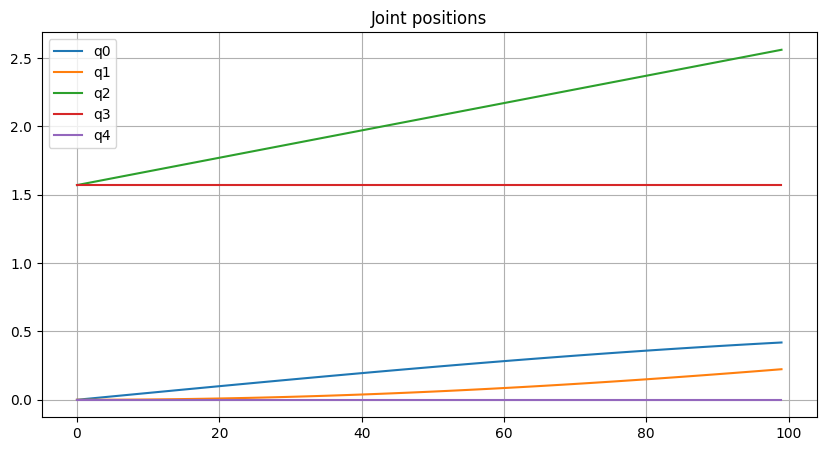

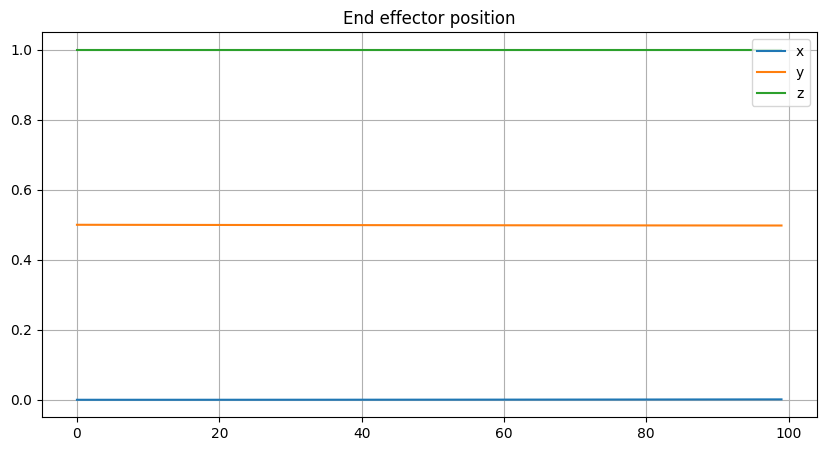

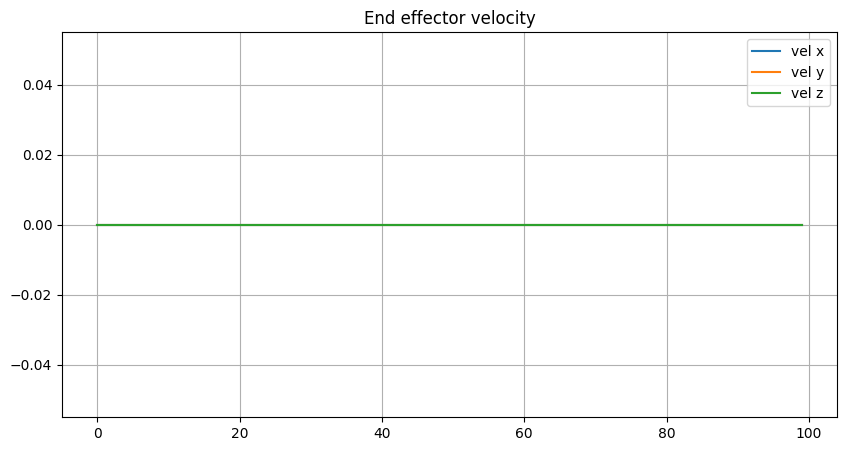

In [81]:
# let start configuration be [0, 0, pi/2, pi/2, 0]
q = np.array([0, 0, np.pi / 2, np.pi / 2, 0]).astype(np.float64)

dt = 0.01

history_q = []
history_pos = []
history_vel = []

# we try to kind of simulate 1 seconds with step dt
for i in range(100):
    history_q.append(q)
    # evaluate jacobian for start configuration
    j0 = J.subs({q0: q[0], q1: q[1], q2: q[2], q3: q[3], q4: q[4]})

    # evaluate dq for start configuration from basis
    dq = basis.subs({q0: q[0], q1: q[1], q2: q[2], q3: q[3], q4: q[4]})

    cartesian_vel = j0 @ dq
    history_vel.append(cartesian_vel)

    change = np.array(dq * dt).flatten().astype(np.float64)

    q = q + change

    history_pos.append(t2pos(fk(q)))

history_q = np.array(history_q)
history_pos = np.array(history_pos)
history_vel = np.array(history_vel)

# plot joint positions
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('Joint positions')
plt.plot(history_q[:, 0], label='q0')
plt.plot(history_q[:, 1], label='q1')
plt.plot(history_q[:, 2], label='q2')
plt.plot(history_q[:, 3], label='q3')
plt.plot(history_q[:, 4], label='q4')
plt.legend()

# plot end effector position
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('End effector position')
plt.plot(history_pos[:, 0], label='x')
plt.plot(history_pos[:, 1], label='y')
plt.plot(history_pos[:, 2], label='z')
plt.legend()

# plot end effector velocity
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('End effector velocity')
plt.plot(history_vel[:, 0], label='vel x')
plt.plot(history_vel[:, 1], label='vel y')
plt.plot(history_vel[:, 2], label='vel z')
plt.legend()

# Example with standing (x, y, z) using one basis from nullspace

![Alt text](https://github.com/lvjonok/f22-fundamentals-of-robotics/blob/master/assignment2/assets/demo.gif)

# Analysis of left null space of Jacobian

Academic idea is given by book: Siciliano - 2009 - Robot Modeling and Control

It is called Jacobian Transpose method, which ensures that error between desired pose and actual will converge to 0.

Left null space of Jacobian, or in current context - null space of Jacobian transpose, is a space of errors which will not affect joint velocities and algorithm would stuck.

In terms of different interpretation this would happen if from current (singular) configuration we could not move along required direction.

Example from the book:

![Book reference](https://github.com/lvjonok/f22-fundamentals-of-robotics/blob/master/assignment2/assets/bookref.png)

In [87]:
# find left null space of jacobian
left_null_space = J.T.nullspace()

# print left null space
left_null_space

[Matrix([
 [                                                                    0],
 [                                                                    0],
 [-1.0*(-2.0*sin(q2(t))**2 - 2.0*cos(q2(t))**2)/(sin(q3(t))*cos(q2(t)))],
 [                                               -sin(q2(t))/cos(q2(t))],
 [                                                                    1],
 [                                                                    0]])]

We can see that there is null space of jacobian transpose defined for symbolic configuration of robot.

In [ ]:
qnull = J.T @ left_null_space[0]

qnull.simplify()

qnull


Matrix([
[0],
[0],
[0],
[0],
[0]])

And ensure that it will not produce joint velocities after multiplication

## The following is the example of the method 'stuck' in the null space

According to the book: 

Velocity: ${\dot{V} = e^{T}K\dot{x_d} - e^{T}KJ_a(q)J_a(q)^{T}Ke}$

Joint velocities choice: $\dot{\bf q} = J^{T}(\bf q) K e$

When $\mathcal{N}({J_a(q)^T}) \neq 0$, velocity is only negative semi-definite, since $\dot{V} = 0$ for $\vec{e} \neq 0$ with $Ke \in \mathcal{N}({J_a(q)^T})$.

In such case algorithm can get stuck at $\dot{\vec{q}} = 0$, with $\vec{e} \neq 0$.

## Error calculation for jacobian transpose method

Error in terms of position (x, y, z) is simple and trivial to calculate, opposite to orientational error.

That happens because there are many ways to describe orientation (any of Euler angles, quaternions, matrices). I had very little idea how to deal with it, but "Siciliano - 2009 - Robotics modelling, planning and control" gives such idea and it worked for me:

No matter which angles of rotation we used at the end we come up with rotational matrix. Which uniqly represents orientation after transformations no matter which configuration we used.

Book proposes such solution:

$R(\theta, \bf{r}) = R_d R_e^{T}(\bf{q})$

Where $R_d$ is desired rotation matrix, and $R_e$ comes from forward kinematics for current configuration.

Error of orientation would be:

$\bf{e}_O = \frac{1}{2} (n_e(q) \times n_d + s_e(q) \times s_d + a_e(q) \times a_d) $

Overall error I will use in Jacobian transpose method would be:

$\bf{e} = \begin{bmatrix}e_P\\e_O\end{bmatrix}$, where $e_P$ will come from error in cartesian pose.

## Example without being stuck

I tried some simulations and actually this algorithm works when conditions above work well (next movement not in null space)

Velocities:

![Alt text](assets/jacobian_converged/vel.png)

Joint positions:

![Alt text](assets/jacobian_converged/joints.png)

Error:

![Alt text](assets/jacobian_converged/error.png)

Pose:

![Alt text](assets/jacobian_converged/pose.png)

## Below you will see example with algorithm stuck from some configuration

![Alt text](https://github.com/lvjonok/f22-fundamentals-of-robotics/blob/master/assignment2/assets/not_converged.gif)

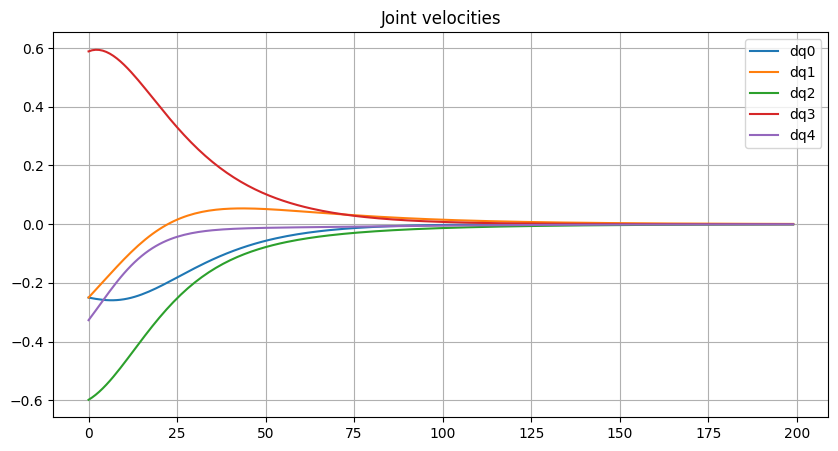

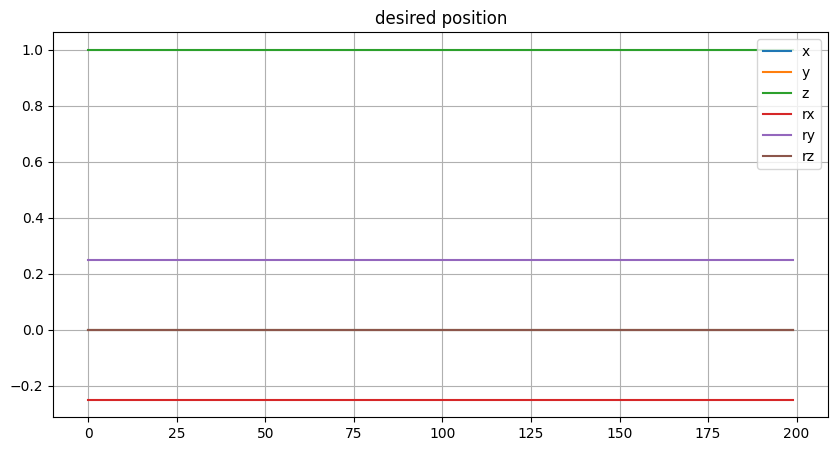

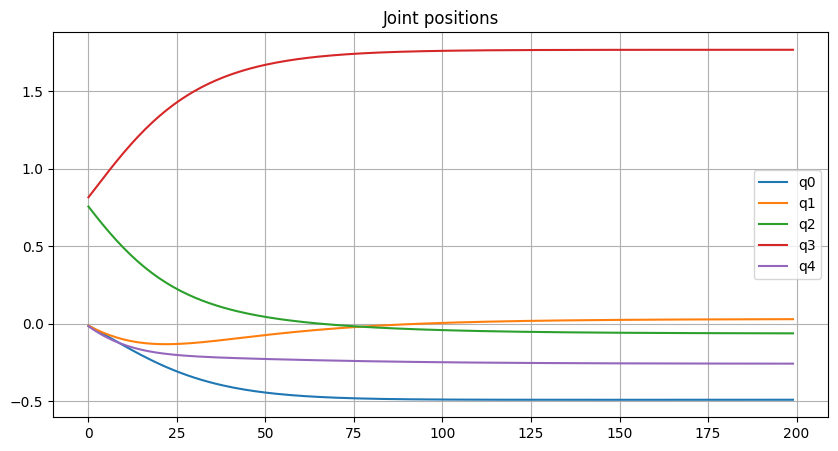

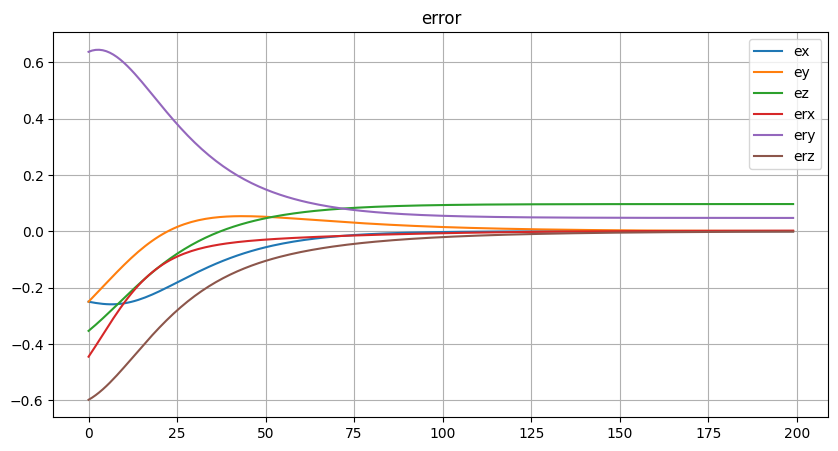

In [93]:
# here is some demo with left null space of jacobian

q = np.array([0, 0, np.pi / 4, np.pi / 4, 0]).astype(np.float64)

dt = 0.05  

history_dq = []
history_dr = []
history_q = []
history_deimpact = []
history_drimpact = []
history_error = []

# try to set "impossible to reach" position
dr = left_null_space[0].subs(
    {q0: q[0], q1: q[1], q2: q[2], q3: q[3], q4: q[4]})

# multiply dr by some factor, such that z will be 1
dr = dr * (1 / dr[2])

dr_pos = dr[:3]  # we separate position and rotation for desired configuration
dr_rot = Rx(dr[3], True) @ Ry(dr[4], True) @ Rz(dr[5], True)

# we try to kind of simulate 1 seconds with step dt
for i in range(200):
    # eval transpose of jacobian
    jt = J.T.subs({q0: q[0], q1: q[1], q2: q[2], q3: q[3], q4: q[4]})

    history_dr.append(dr)

    de = t2pos(fk(q, True))
    de_pos = t2pos(fk(q, True))
    # get matrix 3x3 representing orientation of end effector
    de_rot = t2rot(fk(q, True))

    # compute position error
    pos_error = dr_pos - np.array(de_pos).flatten()

    def cross_sympy(a, b):
        return sp.Array([a[1] * b[2] - a[2] * b[1], a[2] * b[0] - a[0] * b[2], a[0] * b[1] - a[1] * b[0]])

    # compute rotation error (from Sciliano)
    rot_error = 0.5 * (cross_sympy(de_rot[:, 0], dr_rot[:, 0]) + cross_sympy(
        de_rot[:, 1], dr_rot[:, 1]) + cross_sympy(de_rot[:, 2], dr_rot[:, 2]))


    errorvec = sp.Array([[pos_error[0]], [pos_error[1]], [pos_error[2]],
                        [rot_error[0]], [rot_error[1]], [rot_error[2]]])
    history_error.append(np.array(errorvec).flatten())

    dq = jt @ errorvec
    history_dq.append(dq)

    q = q + np.array(dq * dt).flatten().astype(np.float64)
    history_q.append(q)


# plot joint positions
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('Joint velocities')
for i in range(5):
    plt.plot([x[i] for x in history_dq], label=f'dq{i}')

plt.legend()

# plot dr history
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('desired position')
for i in range(6):
    plt.plot([x[i] for x in history_dr], label=[
             'x', 'y', 'z', 'rx', 'ry', 'rz'][i])

plt.legend()

# plot history of q
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('Joint positions')
for i in range(5):
    plt.plot([x[i] for x in history_q], label=f'q{i}')

plt.legend()

# plot error
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('error')
for i in range(6):
    plt.plot([x[i] for x in history_error],
             label=f"e{['x', 'y', 'z', 'rx', 'ry', 'rz'][i]}")
plt.legend()
